In [2]:
!pip install git+https://github.com/rsautter/GPA

  Cloning https://github.com/rsautter/GPA to /tmp/pip-req-build-nyjb4i08
  Running command git clone -q https://github.com/rsautter/GPA /tmp/pip-req-build-nyjb4i08
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for GPA: filename=GPA-1.5-cp36-cp36m-linux_x86_64.whl size=740776 sha256=3114bdab3624bec8f1ce37a3ded269b9d56d70f8593c6379298ebfdd897ac696
  Stored in directory: /tmp/pip-ephem-wheel-cache-tsjxx5ug/wheels/53/e8/31/3a4b685df72633b43063bc73e03cc56a3f4350eaba6c7c7180
Successfully built GPA


In [3]:
import GPA3D 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import time
from scipy.optimize import curve_fit

### Colab spec

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

### Testing 3D random matrices



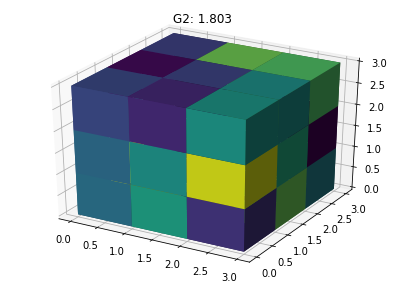

In [ ]:
sample = np.random.rand(27).reshape(3,3,3)
ga = GPA3D.GPA(0.0)
fig = plt.figure(figsize=(7,5))
ax = fig.gca(projection='3d')
facecolors = plt.cm.viridis(sample)
facecolors[:,:,:,-1] = 1.0
ax.voxels(filled=np.ones(sample.shape),facecolors=facecolors)
plt.title("G2: %.3f"%(ga.evaluate(sample)[0]))
plt.show()

In [ ]:
def testDim(dim=3,nsamples = 100,tol=0.01):
  listGa = []
  secondsPerSample = 0.0
  tic = time.perf_counter()
  for i in range(nsamples):
    sample = np.random.rand(dim*dim*dim).reshape(dim,dim,dim)
    ga = GPA3D.GPA(tol)
    g2 = ga.evaluate(sample)[0]
    listGa.append(g2)
  toc = time.perf_counter()
  secondsPerSample = (toc-tic)/nsamples
  return listGa,secondsPerSample

### Measuring overall computing time

> The following code is just an overall performance, it should not be used to rate the algorithm.



In [ ]:
lstDim = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45]

t = []
for d in lstDim:
  ot = testDim(dim=d,nsamples=1)[1]
  t.append(ot)

[ 4.18503112 -5.95449284] 22


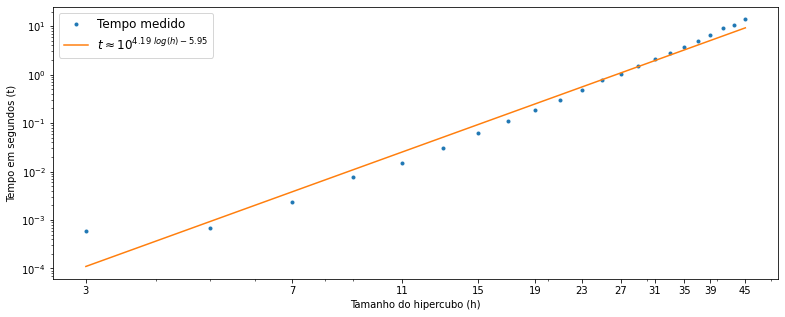

In [ ]:
coeffs = np.polyfit(np.log(lstDim)/np.log(10), np.log(t)/np.log(10),1)
lstDim = np.array(lstDim)
print(coeffs,len(lstDim))

fig1, ax1 = plt.subplots(figsize=(13,5))
ax1.loglog(lstDim,t,'.',label="Tempo medido")
label = r"$t \approx 10^{%.2f \  log(h) %.2f}$"%(coeffs[0],coeffs[1])
ax1.loglog(lstDim,10**(coeffs[0]*np.log(lstDim)/np.log(10)+coeffs[1]),'-',label=label)

ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(ScalarFormatter())
ax1.set_xticks(np.append((lstDim[::2])[:-1],45) )

plt.legend(fontsize=12)
plt.ylabel("Tempo em segundos (t)")
plt.xlabel("Tamanho do hipercubo (h)")
plt.show()

In [ ]:
ot = testDim(dim=3,nsamples=10**5)[1]
print(ot*(10**5))
ot = testDim(dim=45,nsamples=1)[1]
print(ot)

14.012777923000613
13.908304267000858


Setting the sampling size according to a exponential decay, as the computing time grows exponentially 

In [ ]:
samplingSizes = (-5.0/45.0)*lstDim + 5.0
samplingSizes = (10**samplingSizes+9).astype(np.int)
print(samplingSizes)

[46424 27834 16690 10009  6003  3602  2163  1300   783   473   287   175
   109    68    44    30    21    16    13    11    10    10]


### Computing time vs.Hipercube size

In [ ]:
lstDim = np.array([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45])
samplingSizes = (-5.0/45.0)*lstDim + 5.0
samplingSizes = (10**samplingSizes+9).astype(np.int)

t = []
g2s = []
for index,d in enumerate(lstDim):
  g2, ot = testDim(dim=d,nsamples=samplingSizes[index])
  t.append(ot)
  g2s.append(g2)
  print(d,ot,np.mean(g2))

3 0.00013936393384886723 1.8013399739123823
5 0.0005561196056621519 1.9118150190990868
7 0.0021318140950269348 1.9494005318039918
9 0.005754469619042866 1.9651269096631947
11 0.014638110233383362 1.9719011590433235
13 0.031160022349528003 1.974452360522019
15 0.06111352754184012 1.9738404400798526
17 0.11027475124615403 1.9720441518712035
19 0.19004991486206976 1.968461333667865
21 0.30958018454968306 1.9640925778886964
23 0.47997530867944543 1.9576396386837298
25 0.7215420092114281 1.9520712027650682
27 1.0542131293119266 1.9421934800170495
29 1.5009998064411936 1.9331448723468707
31 2.0917111030227136 1.925974018614849
33 2.825148083599985 1.9132226250577706
35 3.7766983624761843 1.902129696602717
37 4.996503455312563 1.8930638423887804
39 6.652857663153834 1.8835805419809502
41 8.381965331272692 1.8580176799228167
43 10.738382009700036 1.8685626293029198
45 13.7792002907001 1.8424164380335875


#### Saving results

In [ ]:
from google.colab import files
np.save("g2ValuesColab",g2s)
np.save("g2timesColab", t)
files.download('g2ValuesColab.npy') 
files.download('g2timesColab.npy') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving g2timesColab.npy to g2timesColab.npy
Saving g2ValuesColab.npy to g2ValuesColab.npy


In [ ]:
!ls

g2timesColab.npy  g2ValuesColab.npy  sample_data


In [5]:
g2s = np.load('g2ValuesColab.npy',allow_pickle=True)
t = np.load('g2timesColab.npy',allow_pickle=True)

### Plotting results

[ 4.47332326 -6.36927088] 22


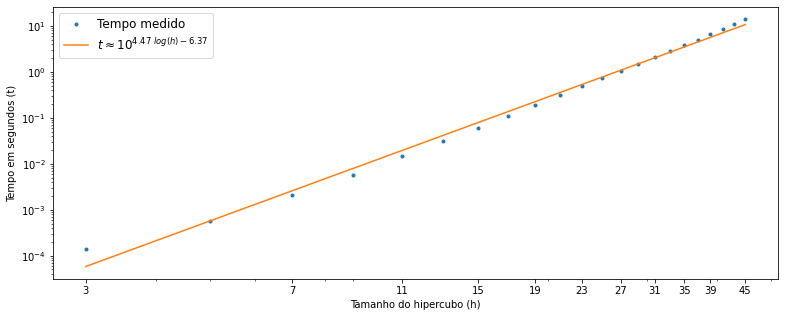

In [6]:
lstDim = np.array([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45])
coeffs = np.polyfit(np.log(lstDim)/np.log(10), np.log(t)/np.log(10),1)
lstDim = np.array(lstDim)
print(coeffs,len(lstDim))

fig1, ax1 = plt.subplots(figsize=(13,5))
ax1.loglog(lstDim,t,'.',label="Tempo medido")
label = r"$t \approx 10^{%.2f \  log(h) %.2f}$"%(coeffs[0],coeffs[1])
ax1.loglog(lstDim,10**(coeffs[0]*np.log(lstDim)/np.log(10)+coeffs[1]),'-',label=label)

ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(ScalarFormatter())
ax1.set_xticks(np.append((lstDim[::2])[:-1],45) )

plt.legend(fontsize=12)
plt.ylabel("Tempo em segundos (t)")
plt.xlabel("Tamanho do hipercubo (h)")
plt.show()

In [ ]:
t[0]

0.00013936393384886723

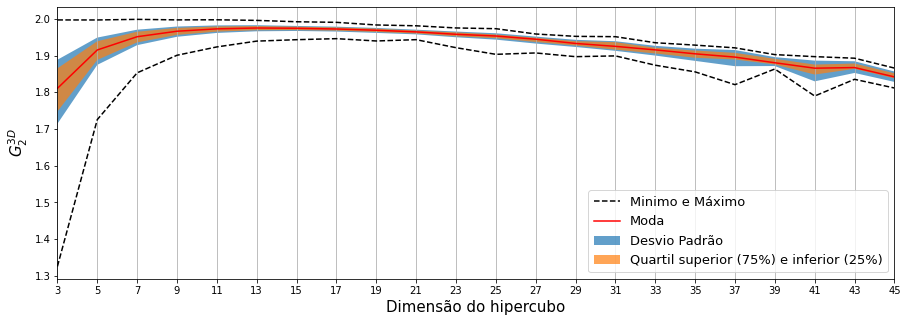

In [13]:
g2s = np.array(g2s)
avg = [np.average(g) for g in g2s]
me = [np.quantile(g,0.5) for g in g2s]
qinf = [np.quantile(g,0.25) for g in g2s]
qsup = [np.quantile(g,0.75) for g in g2s]
gMax = [np.max(g) for g in g2s]
gMin = [np.min(g) for g in g2s]
gStdMax = [np.mean(g)+np.std(g) for g in g2s]
gStdMin = [np.mean(g)-np.std(g) for g in g2s]

fig=plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(lstDim,gMax,'k--',label="Minimo e Máximo")
plt.fill_between(lstDim,gStdMin,gStdMax,alpha=0.7,label=r"Desvio Padrão")
plt.fill_between(lstDim,qinf,qsup,alpha=0.7,label=r"Quartil superior (75%) e inferior (25%)")
plt.plot(lstDim,me,'r',label="Moda")
#plt.plot(lstDim,avg,'b+--',label="Moda")
plt.plot(lstDim,gMin,'k--')
plt.grid(axis='x',which='major')
plt.xticks(lstDim)
plt.xlabel("Dimensão do hipercubo",fontsize=15)
plt.ylabel(r"$G^{3D}_2$",fontsize=15)
plt.xlim(3,45)
plt.legend(fontsize=13)
plt.show()